<a href="https://colab.research.google.com/github/AaronPaul16/ComputerVision-Project/blob/main/CVR(MiniProject)License_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


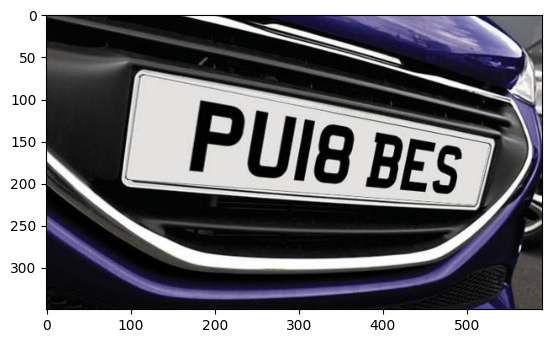

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
filename = "Cars4.png"

car_img = cv2.imread(filename)
car_img=cv2.cvtColor(car_img, cv2.COLOR_BGR2RGB)
plt.imshow(car_img)

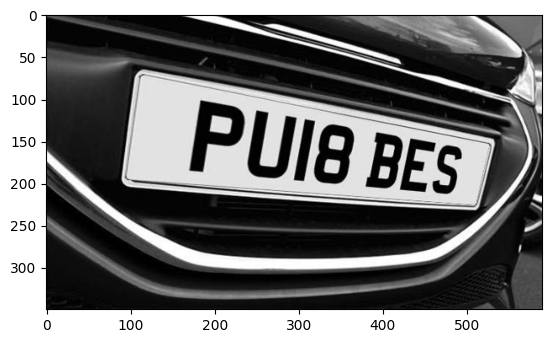

In [ ]:
gray = cv2.cvtColor(car_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

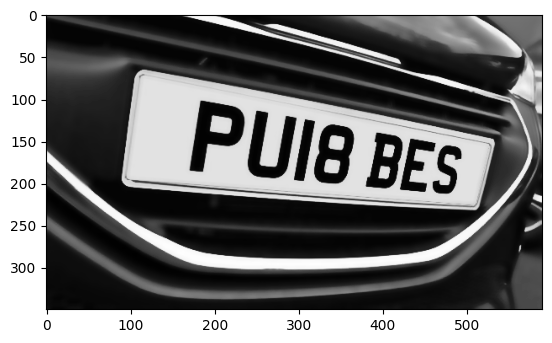

In [ ]:
blurred_gray = cv2.bilateralFilter(gray, 10, 50, 50)
plt.imshow(blurred_gray, cmap='gray', vmin=0, vmax=255)

(350, 590)


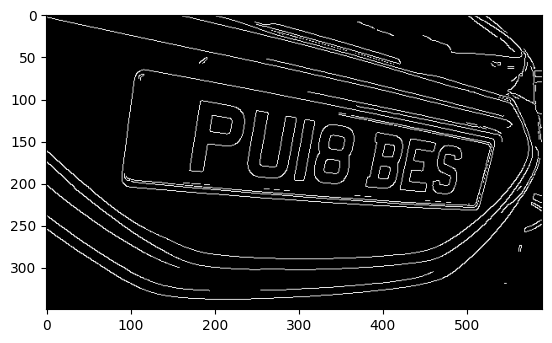

In [ ]:
edged = cv2.Canny(blurred_gray, 140, 200)
print(edged.shape)
plt.imshow(edged, cmap='gray', vmin=0, vmax=255)

1126.2741661071777
[[[106  72]]

 [[ 95 204]]

 [[515 228]]

 [[530 147]]]


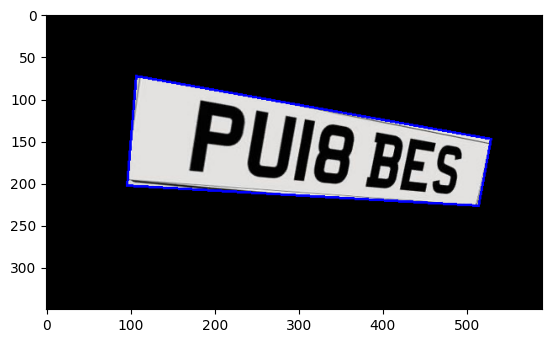

In [ ]:
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:

    peri = cv2.arcLength(c, True)
    print(peri)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    print(approx)
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(car_img, [screenCnt], -1, (0, 0, 255), 3)

    mask = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(car_img,car_img,mask=mask)
    plt.imshow(new_image)

# New Section